## NUS Praktikum 2
Autor: Ole Pearse-Danker

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# Eingabe

h = []

with open("hh_ssw_2024.csv") as file:
    for line in file:
        fields = line.strip().split(",")
        h.append( float(fields[1]) )

### Aufgabe 1 
#### a)


In [118]:
import numpy as np
import matplotlib.pyplot as plt

def tageslaenge(phi, N):
    epsilon_deg = 23.44
    angular_velocity = 2 * np.pi / 365.24
    hours_in_day = 24

    delta = -np.arcsin(np.sin(np.radians(epsilon_deg)) * np.cos(angular_velocity * (N + 10)))
    
    # Clip the intermediate value to prevent invalid input to arccos
    tan_term = -np.tan(delta) * np.tan(np.radians(phi))
    tan_term = np.clip(tan_term, -1, 1)
    
    h = np.arccos(tan_term)
    t = (hours_in_day * h) / np.pi

    return t

tageslaenge_bruttig = tageslaenge(50.13321, 100)
print(tageslaenge_bruttig)

    

13.163571179814438


#### b)


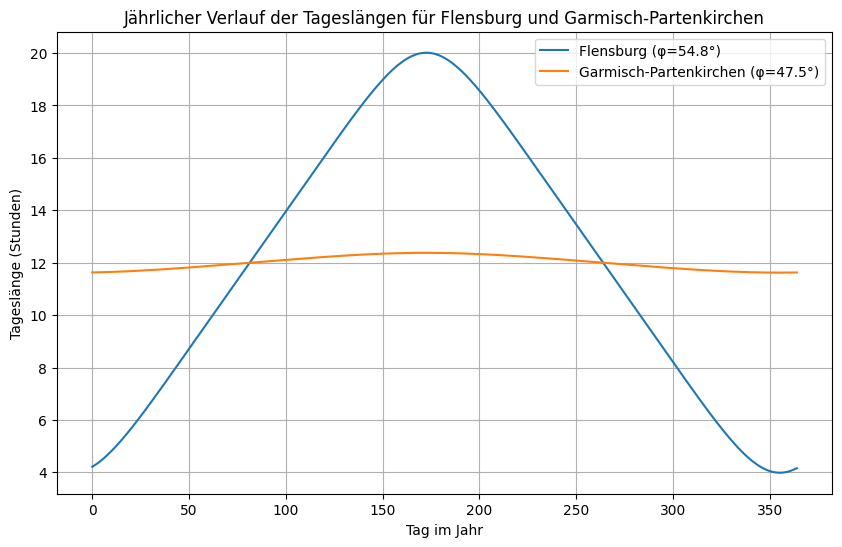

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def tageslaenge(phi, N):
    epsilon_deg = 23.44
    angular_velocity = 2 * np.pi / 365.24
    hours_in_day = 24

    delta = -np.arcsin(np.sin(np.radians(epsilon_deg)) * np.cos(angular_velocity * (N + 10)))
    
    # Clip the intermediate value to prevent invalid input to arccos
    tan_term = -np.tan(delta) * np.tan(np.radians(phi))
    tan_term = np.clip(tan_term, -1, 1)
    
    h = np.arccos(tan_term)
    t = (hours_in_day * h) / np.pi

    return t

# Erzeuge sortierte Werte für Ns
Ns = np.sort(np.random.randint(0, 365, 1000))

# Berechne Tageslängen für Flensburg und Garmisch-Partenkirchen
day_lengths_flensburg = np.array([tageslaenge(63.429048, N) for N in Ns])
day_lengths_garmisch = np.array([tageslaenge(6.49851, N) for N in Ns])

# Sortiere die Tageslängen zusammen mit den richtigen Tagen
idx = np.argsort(Ns)
sorted_Ns = Ns[idx]
sorted_day_lengths_flensburg = day_lengths_flensburg[idx]
sorted_day_lengths_garmisch = day_lengths_garmisch[idx]

# Visualisiere den jährlichen Verlauf der Tageslängen
plt.figure(figsize=(10, 6))
plt.plot(sorted_Ns, sorted_day_lengths_flensburg, label="Flensburg (φ=54.8°)")
plt.plot(sorted_Ns, sorted_day_lengths_garmisch, label="Garmisch-Partenkirchen (φ=47.5°)")
plt.xlabel("Tag im Jahr")
plt.ylabel("Tageslänge (Stunden)")
plt.title("Jährlicher Verlauf der Tageslängen für Flensburg und Garmisch-Partenkirchen")
plt.legend()
plt.grid(True)
plt.show()


#### c)


In [120]:

# Finde das Minimum und Maximum der sortierten Tageslängen für Flensburg
min_day_length_flensburg = np.min(sorted_day_lengths_flensburg)
max_day_length_flensburg = np.max(sorted_day_lengths_flensburg)

# Finde das Minimum und Maximum der sortierten Tageslängen für Garmisch-Partenkirchen
min_day_length_garmisch = np.min(sorted_day_lengths_garmisch)
max_day_length_garmisch = np.max(sorted_day_lengths_garmisch)

print("\nMinimum und Maximum von sortierten Tageslängen für Flensburg:")
print("Minimum Tageslänge Flensburg:", min_day_length_garmisch)
print("Maximum Tageslänge Flensburg:", max_day_length_flensburg)

print("\nMinimum und Maximum von sortierten Tageslängen für Garmisch-Partenkirchen:")
print("Minimum Tageslänge Garmisch:", min_day_length_garmisch)
print("Maximum Tageslänge Garmisch:", max_day_length_garmisch)

summer_diff_length = max_day_length_flensburg - max_day_length_garmisch
winter_diff_length = min_day_length_garmisch - min_day_length_garmisch


print("Sonnenstunden mehr im Sommer in Flensburg:", summer_diff_length)
print("Sonnenstunden mehr im Winter in Garmisch-Partenkirchen:", winter_diff_length)



Minimum und Maximum von sortierten Tageslängen für Flensburg:
Minimum Tageslänge Flensburg: 11.622558451301627
Maximum Tageslänge Flensburg: 20.013234428704553

Minimum und Maximum von sortierten Tageslängen für Garmisch-Partenkirchen:
Minimum Tageslänge Garmisch: 11.622558451301627
Maximum Tageslänge Garmisch: 12.37743578496153
Sonnenstunden mehr im Sommer in Flensburg: 7.635798643743023
Sonnenstunden mehr im Winter in Garmisch-Partenkirchen: 0.0


#### Auswertung

Für Orte die noch weiter im Süden oder Norden liegen, habe ich Lagos (Nigera, phi = 6.49851) und Trondheim (Norwegen, phi = 63.429048) miteinander verglichen. Es zeigt sich, das mit zunehmender Annäherung an den Äquator die Tageslänge konstant wird, d.h die Differenz zwischen längstem und kürzestem Tag immer geringer ausfällt. Die umgekehrte Logik gilt für eine zunehmende Entfernung vom Äquator.

#### Aufgabe 2
#### a)

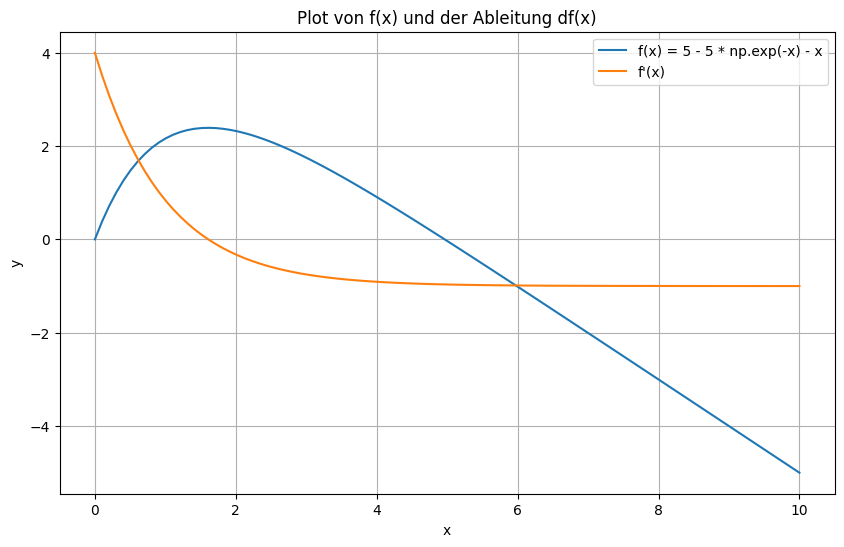

In [121]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the functions symbolically
x = sp.symbols('x')
f_sym = 5 - 5 * sp.exp(-x) - x
df_sym = sp.diff(f_sym, x)

# Define the functions numerically
f = sp.lambdify(x, f_sym, 'numpy')
df = sp.lambdify(x, df_sym, 'numpy')

# Create an array of x values
x_values = np.linspace(0, 10, 100)

# Calculate y values for f(x) and df(x)
y_f = f(x_values)
y_df = df(x_values)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_f, label='f(x) = 5 - 5 * np.exp(-x) - x')
plt.plot(x_values, y_df, label="f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot von f(x) und der Ableitung df(x)')
plt.legend()
plt.grid(True)
plt.show()


#### b) Konvergenzverhalten Newton-Verfahren


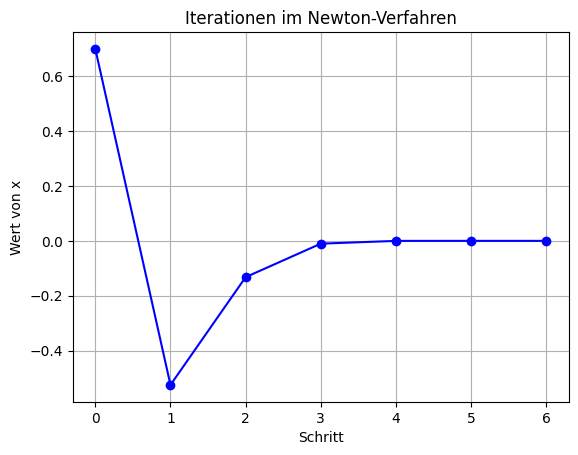

Nullstelle von f mit einer Genauigkeit 1.0e-06: 1.0491549807450665e-16
Benötigte Schritte für die Genauigkeit 1.0e-06: 6


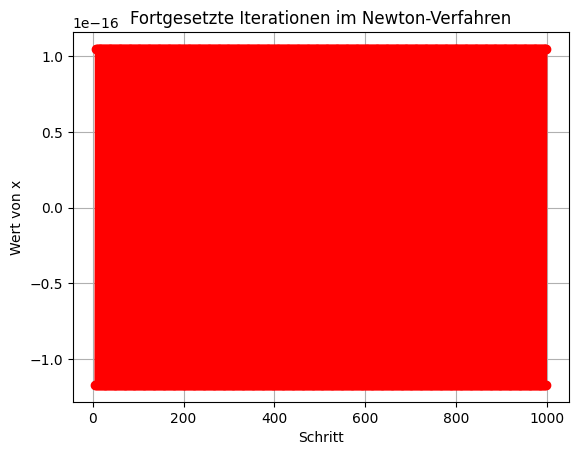

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definiere die Funktionen symbolisch
x = sp.symbols('x')
f_sym = 5 - 5 * sp.exp(-x) - x
df_sym = sp.diff(f_sym, x)

# Konvertiere symbolische Funktionen in numerische Funktionen
f = sp.lambdify(x, f_sym, 'numpy')
df = sp.lambdify(x, df_sym, 'numpy')

def nullstelle_new(f, df, x0, eps, *args):
    """
    Bestimme die Nullstelle einer Funktion mit Hilfe des Newton-Verfahrens
    
    Parameter:
        f: Eine Funktion f(x,*args)
        df: Ableitung der Funktion f
        x0: Startwert 
        eps: Zielgenauigkeit
        *args: Zusätzliche Argumente für die Funktionen f und df.
    
    Rückgabewerte:
        x0: Nullstelle der Funktion
        steps: Schrittzahl
    """
    steps_max = 100
    x_values = [x0]  # Liste zum Speichern der Iterationswerte
    for steps in range(1, steps_max):
        fx0 = f(x0, *args)
        dfx0 = df(x0, *args)

        x1 = x0 - fx0 / dfx0
        x_values.append(x1)

        if np.abs(x1 - x0) < eps:
            return x1, steps, x_values  # Gebe auch die Iterationswerte zurück

        x0 = x1

x0 = 0.7
eps = 1e-6

# Bestimme die Nullstelle und die Iterationswerte
nullstelle, schritte, x_values = nullstelle_new(f, df, x0, eps)

# Plot der Iterationswerte
plt.figure()
plt.plot(range(len(x_values)), x_values, marker='o', linestyle='-', color='b')
plt.xlabel('Schritt')
plt.ylabel('Wert von x')
plt.title('Iterationen im Newton-Verfahren')
plt.grid()
plt.show()

print(f"Nullstelle von f mit einer Genauigkeit {eps:.1e}: {nullstelle}")
print(f"Benötigte Schritte für die Genauigkeit {eps:.1e}: {schritte}")


# Fortführung der Iterationen
max_steps = 1000  # Maximal Anzahl von Schritten für die Fortsetzung
continue_values = []  # Liste zum Speichern der weiteren Werte

for more_steps in range(schritte, max_steps):
    fx = f(nullstelle)
    dfx = df(nullstelle)

    if dfx == 0:
        break

    new_value = nullstelle - fx / dfx
    continue_values.append(new_value)
    nullstelle = new_value

# Plot der fortgesetzten Iterationen
plt.figure()
plt.plot(range(schritte, schritte + len(continue_values)), continue_values, marker='o', linestyle='-', color='r')
plt.xlabel('Schritt')
plt.ylabel('Wert von x')
plt.title('Fortgesetzte Iterationen im Newton-Verfahren')
plt.grid()
plt.show()



#### Auswertung

Wenn man die Iterationen fortsetzt, kommt es zur Oszillation der Näherungswerte. Das bedeutet, dass die Näherungswerte hin und her springen, ohne sich einer endgültigen Lösung anzunähern. Dies kann auf numerische Instabilität zurückzuführen zu sein.

#### c) Konvergenzverhalten Bisektionsverfahren

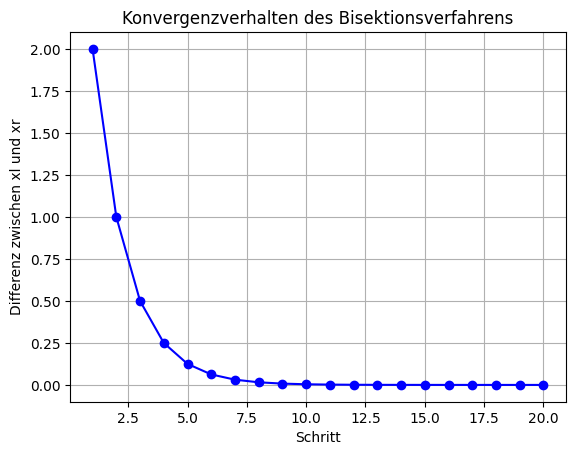

Nullstelle mit Genauigkeit 1.0e-06 nach 21 Schritten: 1.9999990463256836


In [123]:
import numpy as np
import matplotlib.pyplot as plt

def nullstelle_bis(f, xl, xr, eps, *args):
    """
    Bestimme die Nullstelle einer Funktion mit Hilfe des Bisektionsverfahrens

    Parameter:
        f: Eine Funktion f(x,*args)
        xl: Linke Grenze
        xr: Rechte Grenze
        eps: Zielgenauigkeit
        *args: Zusätzliche Argumente für die Funktion f.

    Rückgabewerte:
        x0: Nullstelle der Funktion
        steps: Schrittzahl
    """
    steps_max = 100
    fl = f(xl, *args)
    fr = f(xr, *args)
    
    if fl * fr > 0:
        raise ValueError("Function does not have opposite signs at the interval endpoints.")
    
    diff_values = []  # Liste zum Speichern der Differenzen zwischen Ober- und Untergrenze
    
    for steps in range(1, steps_max):
        xm = 0.5*(xl + xr)

        if 0.5*(xr - xl) < eps:
            return xm, steps, diff_values

        diff_values.append(np.abs(xr - xl))
        
        fm = f(xm, *args)

        if fm == 0.:
            return xm, steps  # xm is a root of the function
        elif fl * fm < 0.:
            xr = xm
        else:
            xl = xm

    return 0.5*(xl + xr), steps_max, diff_values

# Beispiel-Funktion für f(x)
def f(x, *args):
    return x**2 - 4

# Initialisierung der Grenzen und Genauigkeit
xl = 0
xr = 2
eps = 1e-6

# Berechnung der Nullstelle und Schritte im Bisektionsverfahren
nullstelle, schritte, diff_values = nullstelle_bis(f, xl, xr, eps)

# Plot der Differenzen zwischen Ober- und Untergrenze über den Schritten
plt.figure()
plt.plot(range(1, len(diff_values) + 1), diff_values, marker='o', linestyle='-', color='b')
plt.xlabel('Schritt')
plt.ylabel('Differenz zwischen xl und xr')
plt.title('Konvergenzverhalten des Bisektionsverfahrens')
plt.grid()
plt.show()

print(f"Nullstelle mit Genauigkeit {eps:.1e} nach {schritte} Schritten: {nullstelle}")


#### Auswertung

Es ist festzuhalten, dass das Bisektionsverfahren deutlich mehr Schritte (21), als das Newton-Verfahren benötigt(6), um eine Nullstelle mit der Genauigkeit von 1.0e-06 zu bestimmen

#### Aufgabe 3

#### a) Dateien einlesen

float64 1017


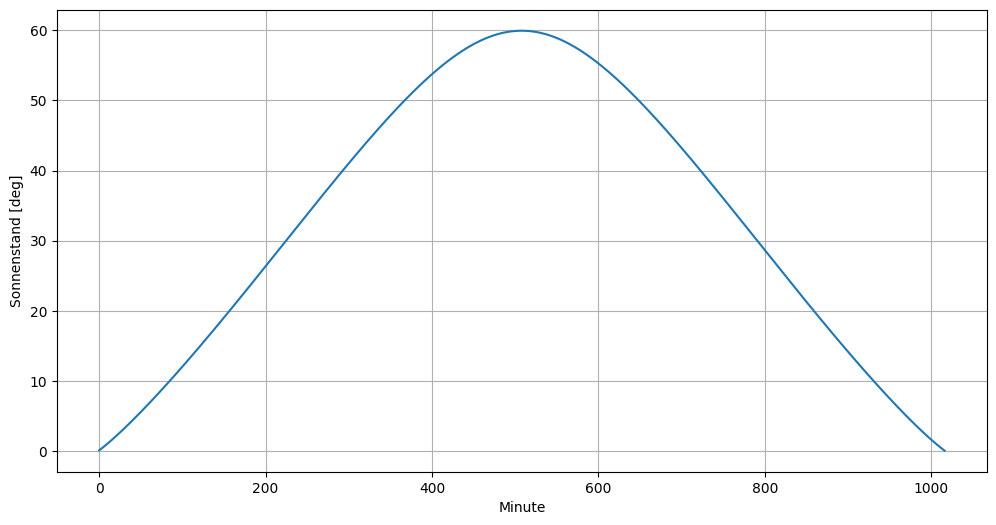

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Eingabe

h = []

with open("hh_ssw_2024.csv") as file:
    for line in file:
        fields = line.strip().split(",")
        h.append( float(fields[1]) )

# Verarbeitung

h_arr = np.array( h )

h_arr = np.radians( h_arr )

print(h_arr.dtype, len(h_arr))

fig = plt.figure(figsize=(12,6))

idx = np.arange(len(h_arr))

plt.plot(idx, np.degrees(h_arr))
plt.xlabel("Minute")
plt.ylabel("Sonnenstand [deg]")
plt.grid(True)
plt.show()



#### b) Einstrahlung


Maximale Einstrahlung: 0.91 kW/m²


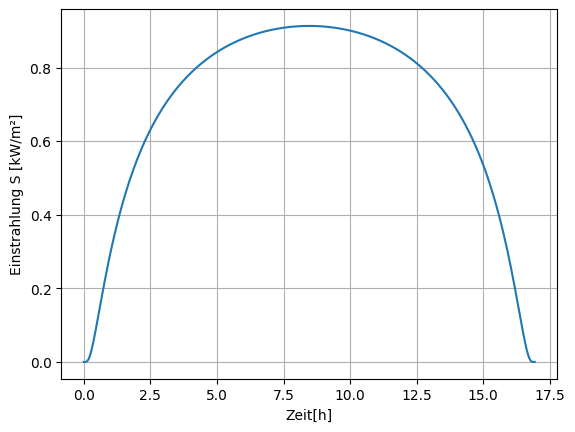

In [125]:
def einstrahlung(h):
    a = 1 / (np.sin(h) ** (0.678))
    s = (1353 * 0.7 ** a) / 1000  # Umrechnung in kW
    return s

s = einstrahlung(h_arr) # Array mit Einstrahlungswerten in Minutenauflösung

max_s = np.max(s) # höchste Einstrahlung / Leistung
print(f"Maximale Einstrahlung: {max_s:.2f} kW/m²")

idx= np.arange(len(s)) / 60  # Umrechnung in Stunden
plt.plot(idx, s)
plt.xlabel("Zeit[h]")
plt.ylabel("Einstrahlung S [kW/m²]")
plt.grid(True)
plt.show()

#### Auswertung
Die maximale Leistung pro Quadratmeter einer PV-Anlage in Hamburg unter idealen Bedingungen beträgt: **0.91 kW/m²**

#### c)


In [126]:
# Berechnung der elektrischen Leistung über den Tag in kWh
elektrische_leistung_kwh = np.sum(s) / 60  # Da 1h = 60 Min für die Umrechnung von kW zu kWh

# Ausgabe der über den Tag gewonnenen elektrischen Leistung in kWh
print(f"Über den Tag gewonnene elektrische Leistung: {elektrische_leistung_kwh:.2f} kWh")

Über den Tag gewonnene elektrische Leistung: 11.65 kWh


#### Auswertung

Die über den Tag gewonnene elektrische Energie kann als Integral über die Einstrahlungsfunktion S bestimmt werden, da das Integral einer Funktion über einen Zeitraum die gesamte "Fläche" unter der Kurve darstellt. In Bezug auf die Einstrahlungsfunktion S ist diese "Fläche" die gesamte elektrische Energie, die über die Zeit gewonnen wird.

Durch die Integration der Einstrahlungsfunktion S über die Zeit erhält man die gesamte Energie, die über die Dauer des Tages gewonnen wird. Das Integral summiert im Wesentlichen die Einstrahlungswerte (in kW) über die gesamte Zeitdauer und gibt die gesamte Energieerzeugung in Kilowattstunden (kWh) zurück.

#### Aufgabe 4

#### a)

In [127]:
kB = 1.380649e-23  # Boltzmann-Konstante in J/K
T = 5780 # Temperatur der Sonnenoberfläche in K
c = 299792458  # Lichtgeschwindigkeit in m/s
h = 6.62607015e-34  # Planck-Konstante in Js

def B(lam, T):
    return 2 * h * c ** 2 / lam ** 5 / (np.exp(h * c / lam / kB / T) - 1)

pv_example = B(1.1e-6, T)  # Beispiel für Photovoltaik bei 1100 nm
print(f"Planck-Intensität bei einer Wellenlänge von 1100nm und 20°C: {pv_example:.2f} ")


Planck-Intensität bei einer Wellenlänge von 1100nm und 20°C: 8588065020637.91 


#### b)


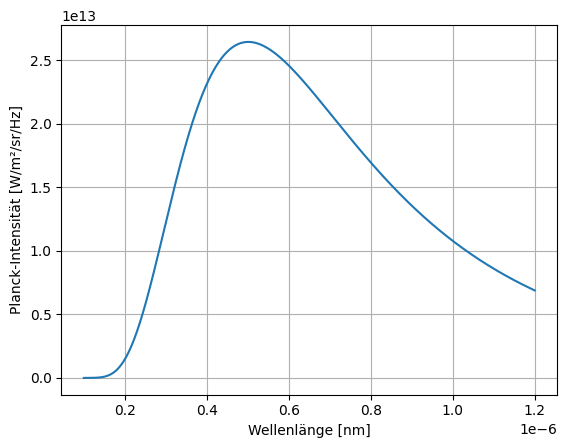

In [128]:

# Berechnung der Planck-Intensitäten für verschiedene Wellenlängen
lam_values = np.arange(0.1e-6, 1.2e-6, 0.1e-9)

b = B(lam_values, T)

plt.plot(lam_values,b)
plt.xlabel("Wellenlänge [nm]")
plt.ylabel("Planck-Intensität [W/m²/sr/Hz]")
plt.grid(True)
plt.show()


#### c)


In [130]:

def integriere_mit_simpson(a, b, n=1000):
    if n % 2:
        n += 1  
    h = (b - a) / n
    x_werte = np.linspace(a, b, n+1)
    y_werte = B(x_werte, T)
    simpson_summe = y_werte[0] + y_werte[-1] + 4 * np.sum(y_werte[1:-1:2]) + 2 * np.sum(y_werte[2:-2:2])
    return h/3 * simpson_summe

# Integrationsgrenzen n 
untergrenze_nutzen = 10e-9 
obergrenze_nutzen = 1100e-9  
untergrenze_gesamt = 10e-9  
obergrenze_gesamt = 10000e-9  

# Berechnung der Integrale
integral_nutzen = integriere_mit_simpson(untergrenze_nutzen, obergrenze_nutzen)
integral_gesamt = integriere_mit_simpson(untergrenze_gesamt, obergrenze_gesamt)

# Berechnung des prozentualen Anteils der nutzbaren Sonnenstrahlung
prozent_verwertbar = (integral_nutzen / integral_gesamt) * 100

print(f"Anteil der verwertbaren Sonnenstrahlung: {prozent_verwertbar:.2f}%")


Anteil der verwertbaren Sonnenstrahlung: 76.67%


#### Auswertung

Herkömmliche Siliziumzellen absorbieren Licht mit einer Wellenlänge zwischen 800 und 1200 nm. Eine Wellenlänge von 10 nm ist demnach zu gering, um sie photoelektrisch nutzen zu können.